In [345]:
# Imports
import numpy as np
from matplotlib import pyplot as plt

In [480]:
# Definitions
NUM_LENGTH_UNITS = 25
TIME_LIMIT = 50
TIME_STEP = 2.0
ORIGIN = int(NUM_LENGTH_UNITS/2)
THRESHOLD = 0.1

# Diffusion equation parameters
D = 0.01
dt = 0.05
dx = 0.08

# Heatmap
heatmap1 = plt.get_cmap('hot')
heatmap2 = 'viridis'

In [518]:
def decent_chance(x):
    return (x > THRESHOLD)

def at_boundary(x):
    return (x == 0 or x == (NUM_LENGTH_UNITS - 1))

In [519]:
# Generate probability matrix
posX = np.linspace(-1, 1, NUM_LENGTH_UNITS)
posY = np.linspace(-1, 1, NUM_LENGTH_UNITS)
time = np.arange(0, TIME_LIMIT, TIME_STEP)

# Initialize P
shape = (len(time) + 1, NUM_LENGTH_UNITS)
P = np.zeros(shape)

# Since the particle starts at origin at time t=0, probability=1
P[0][ORIGIN] = 1

# Loop to generate probability matrix
for t in range(len(time)):
    for x in range(len(posX)):
        
        # Boundary condition
        if at_boundary(x):
            P[t+1][x] = 0
            continue
            
        # Diffusion equation
        P[t+1, x] = P[t, x] + D*dt/(dx**2)*(P[t, x+1] - 2*P[t, x] + P[t, x-1])
        
# Display probability matrix
# P

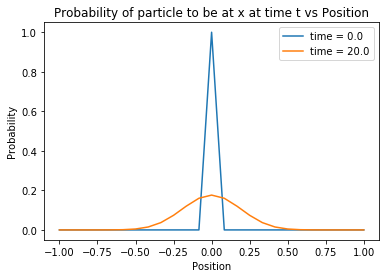

In [520]:
# Graph: Probability of particle to be at x at time t vs x
legend = []

# Generate plots
step = 10
for t in range(0, len(P) - step, step):
    
    # Ignore graphs which are too spread to prevent crowding
#     if not decent_chance(P[t][mid]):
#         continue
        
    # Plot graph
    plt.plot(posX, P[t])
    legend.append(f"time = {time[t]}")

# Graph attributes
plt.title("Probability of particle to be at x at time t vs Position")
plt.legend(legend)
plt.xlabel("Position")
plt.ylabel("Probability")
plt.show()

1: 0
2: 10
3: 50
4: 100


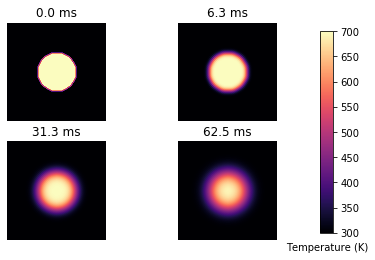

In [544]:
# Plate dimensions (mm)
width = 10
height = 10

# Intervals (mm)
dx = 0.1
dy = 0.1

# Thermal diffusivity of steel
D = 4
# D = 6

# Temperature of metal plate and disc
T_low = 300
T_high = 700

# Number of steps
num_x = int(width/dx)
num_y = int(height/dy)

# Square dx and dy
dx2 = dx**2
dy2 = dy**2

dt = (dx2*dy2) / (2*D*(dx2 + dy2))

shape = (num_x, num_y)
u0 = T_low * np.ones(shape)
u = u0.copy()

# Initial conditions - circle centred at (center_x,center_y) (mm)
# Circle parameters
radius = 2
center_x = 5
center_y = 5

# Square radius
radius2 = r**2

# Set the points under the hot disc as T_high
for i in range(num_x):
    x = i*dx
    
    for j in range(num_y):
        y = j*dy
        
        # Under disc
        p2 = (x - center_x)**2 + (y - center_y)**2
        
        # Set temperature to high
        if p2 < r**2:
            u0[i,j] = T_high

def execute_timestep(u0, u):
    # Propagate with forward-difference in time, central-difference in space
    u[1:-1, 1:-1] = u0[1:-1, 1:-1] + D * dt * (
          (u0[2:, 1:-1] - 2*u0[1:-1, 1:-1] + u0[:-2, 1:-1])/dx2
          + (u0[1:-1, 2:] - 2*u0[1:-1, 1:-1] + u0[1:-1, :-2])/dy2 )

    u0 = u.copy()
    return u0, u
            
# Number of timesteps
num_timesteps = 101

# Output 4 figures at these timesteps
set_timesteps = [0, 10, 50, 100]
fig_num = 1
fig = plt.figure()

for timestep in range(num_timesteps):
    u0, u = do_timestep(u0, u)
    
    if timestep in set_timesteps:
        print(str(fig_num) + ": " + str(timestep))
        
        axis = fig.add_subplot(220 + fig_num)
        im = axis.imshow(u.copy(), cmap=plt.get_cmap('magma'), vmin=T_low, vmax=T_high)
        axis.set_axis_off()
        axis.set_title('{:.1f} ms'.format(timestep*dt*1000))
        
        fig_num += 1
        
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
cbar_ax.set_xlabel('Temperature (K)', labelpad=10)
fig.colorbar(im, cax=cbar_ax)
plt.show()